In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def kdj_pressure_factor(df, n=9, m=3):
    low_min = df['low'].rolling(n).min()
    high_max = df['high'].rolling(n).max()
    rsv = 100 * (df['close'] - low_min) / (high_max - low_min + 1e-8)
    K = rsv.ewm(alpha=1/m, adjust=False).mean()
    D = K.ewm(alpha=1/m, adjust=False).mean()
    J = 3*K - 2*D
    # Normalized pressure score: positive = overbought, negative = oversold
    return (K + D + J)/3 - 50

In [5]:
evaluator.set_factor(
    factor_data_or_func=kdj_pressure_factor,
    factor_name='kdj_pressure_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): 0.009662
   Rank_IC (Spearman): -0.020787
📊 信息比率:
   IR: 0.397469
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130740
   因子列: kdj_pressure_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


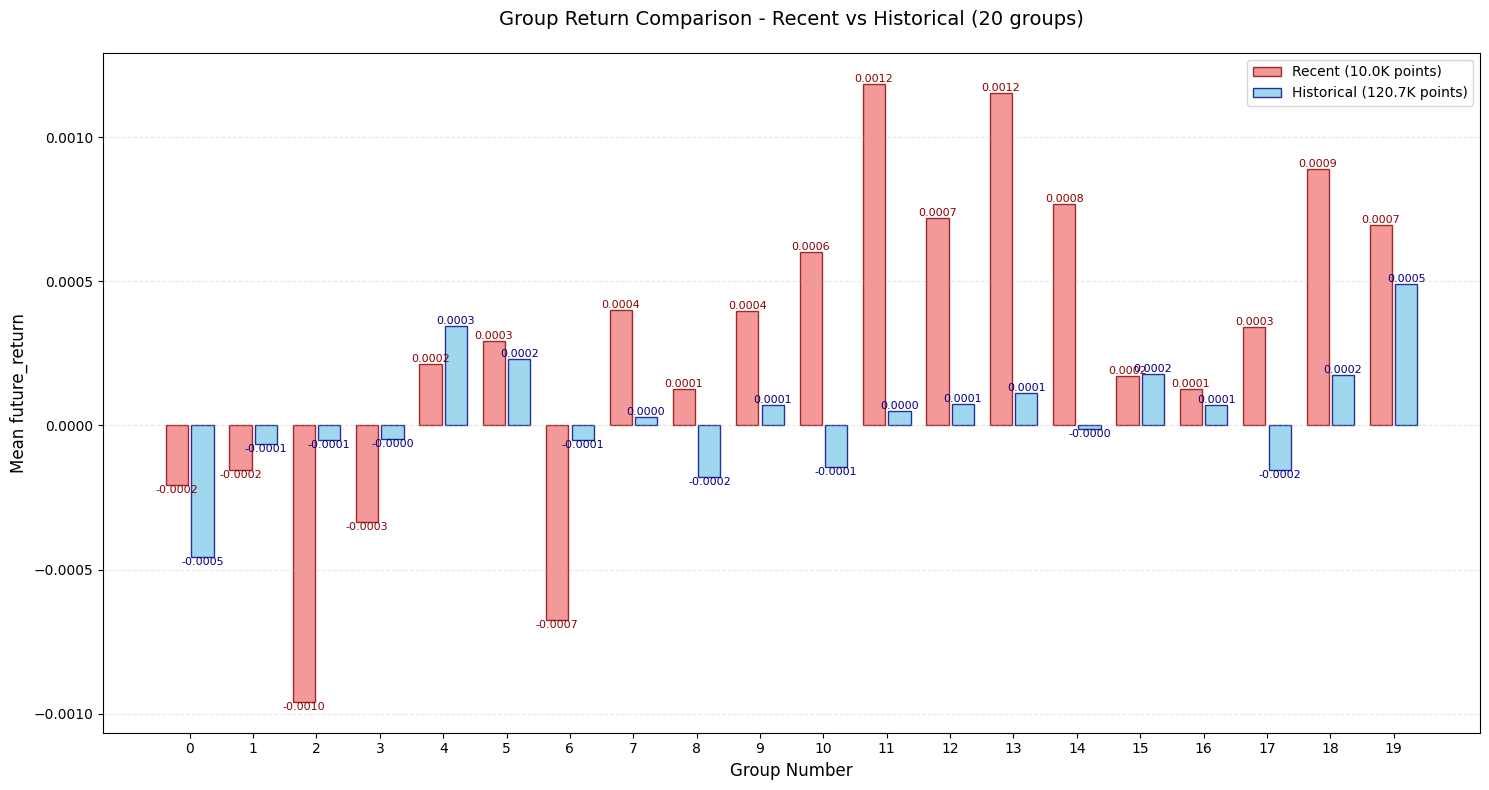

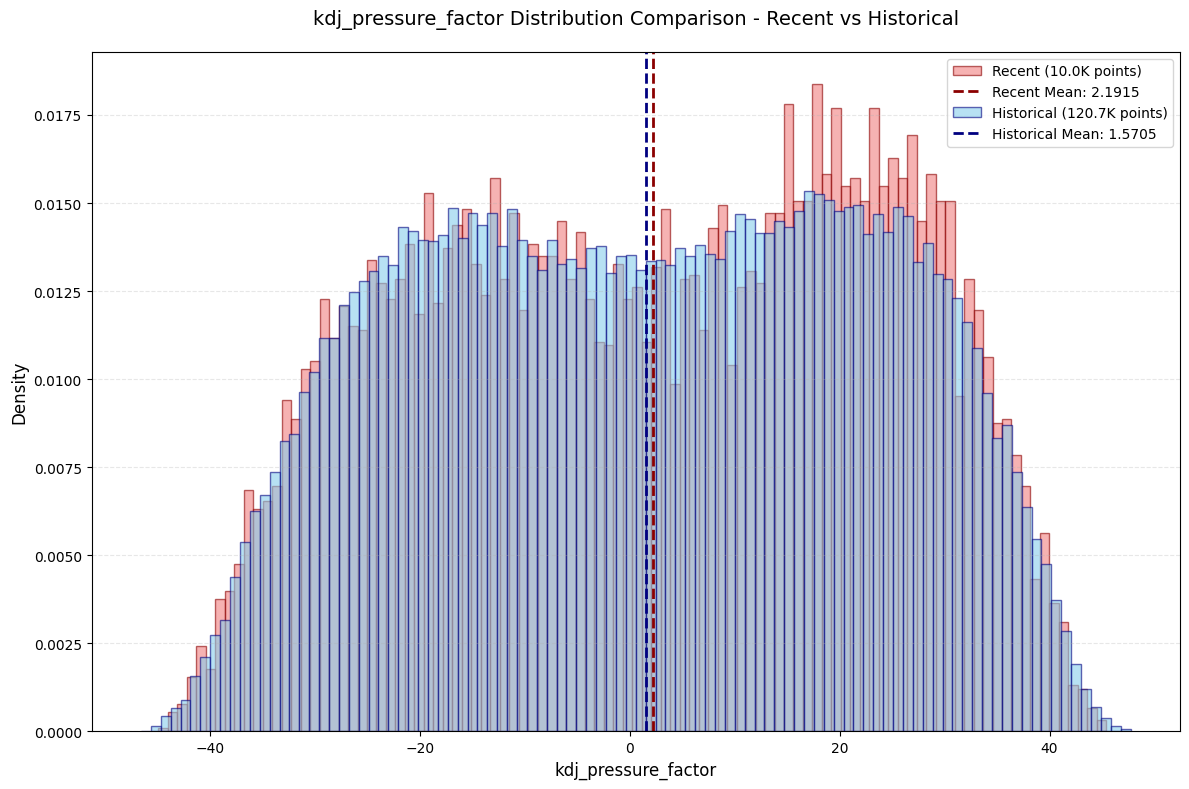

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)